In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 16.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=92cc2529f900942cb2154136dd3885cf54f452566588974fc1921ae50961bdba
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
!pip install gradio
!pip install PIL
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Bigdata

/content/drive/MyDrive/Bigdata


In [5]:

#Replace part of string with another string
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import mean, col, max, countDistinct, concat
from pyspark.sql.functions import col,isnan, when, count
import pandas as pd
from datetime import datetime
from dateutil import parser
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import time
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import PIL
import gradio as gr



In [6]:
df_train = pd.read_csv('train.csv', low_memory=False)

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df = spark.read.csv("train.csv",header=True,sep=",")

# print(df.collect())

In [ ]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df.count(), len(df.dtypes)))


Total Row Number: 682154 
Total Col Number: 49


In [ ]:
df.show()

+----------+--------------+----+-----+-----+----+----+----+-----------+------+-------+-----------------+------------+------+--------+-------+---------+--------------+----+--------+-------------+-------------------+----------------------+-----------+----------------+----------------+-----------------+----------------+-------------+--------------------+--------------------+-----+------------+------------+---------------+-----------------+--------+------------+---------------+----+----------------+--------------+-----------+----------+--------------+-----------+--------+---------+-------------+
|    GameId|        PlayId|Team|    X|    Y|   S|   A| Dis|Orientation|   Dir|  NflId|      DisplayName|JerseyNumber|Season|YardLine|Quarter|GameClock|PossessionTeam|Down|Distance|FieldPosition|HomeScoreBeforePlay|VisitorScoreBeforePlay|NflIdRusher|OffenseFormation|OffensePersonnel|DefendersInTheBox|DefensePersonnel|PlayDirection|         TimeHandoff|            TimeSnap|Yards|PlayerHeight|PlayerWe

In [ ]:
df.columns

['GameId',
 'PlayId',
 'Team',
 'X',
 'Y',
 'S',
 'A',
 'Dis',
 'Orientation',
 'Dir',
 'NflId',
 'DisplayName',
 'JerseyNumber',
 'Season',
 'YardLine',
 'Quarter',
 'GameClock',
 'PossessionTeam',
 'Down',
 'Distance',
 'FieldPosition',
 'HomeScoreBeforePlay',
 'VisitorScoreBeforePlay',
 'NflIdRusher',
 'OffenseFormation',
 'OffensePersonnel',
 'DefendersInTheBox',
 'DefensePersonnel',
 'PlayDirection',
 'TimeHandoff',
 'TimeSnap',
 'Yards',
 'PlayerHeight',
 'PlayerWeight',
 'PlayerBirthDate',
 'PlayerCollegeName',
 'Position',
 'HomeTeamAbbr',
 'VisitorTeamAbbr',
 'Week',
 'Stadium',
 'Location',
 'StadiumType',
 'Turf',
 'GameWeather',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'WindDirection']

In [ ]:

#Pandas
start = time.time()
nullvalues = df_train.loc[:, df_train.isnull().any()].isnull().sum()
end = time.time()
print(end-start)

#Spark
start = time.time()
unique_value = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
end = time.time()
print(end-start)

unique_value.show()

2.455684185028076
1.692192792892456
+------+------+----+---+---+---+---+---+-----------+---+-----+-----------+------------+------+--------+-------+---------+--------------+----+--------+-------------+-------------------+----------------------+-----------+----------------+----------------+-----------------+----------------+-------------+-----------+--------+-----+------------+------------+---------------+-----------------+--------+------------+---------------+----+-------+--------+-----------+----+-----------+-----------+--------+---------+-------------+
|GameId|PlayId|Team|  X|  Y|  S|  A|Dis|Orientation|Dir|NflId|DisplayName|JerseyNumber|Season|YardLine|Quarter|GameClock|PossessionTeam|Down|Distance|FieldPosition|HomeScoreBeforePlay|VisitorScoreBeforePlay|NflIdRusher|OffenseFormation|OffensePersonnel|DefendersInTheBox|DefensePersonnel|PlayDirection|TimeHandoff|TimeSnap|Yards|PlayerHeight|PlayerWeight|PlayerBirthDate|PlayerCollegeName|Position|HomeTeamAbbr|VisitorTeamAbbr|Week|Stadium|

In [ ]:
#Pandas
start = time.time()
unique_plays = df_train.groupby('Season').agg({'PlayId': 'nunique', 'GameId': 'nunique', 'NflId':'nunique'})
end = time.time()
print(end-start)

#Spark
start = time.time()
playIddistinct = df.groupBy("Season").agg(countDistinct('PlayId')) 
GameIddistinct = df.groupBy("Season").agg(countDistinct('GameId')) 
NflIddistinct = df.groupBy("Season").agg(countDistinct('NflId')) 

end = time.time()
print(end-start)


playIddistinct.show()
GameIddistinct.show()
NflIddistinct.show()

0.15364837646484375
0.1339108943939209
+------+-------------+
|Season|count(PlayId)|
+------+-------------+
|  2019|         7836|
|  2017|        11900|
|  2018|        11271|
+------+-------------+

+------+-------------+
|Season|count(GameId)|
+------+-------------+
|  2019|          176|
|  2017|          256|
|  2018|          256|
+------+-------------+

+------+------------+
|Season|count(NflId)|
+------+------------+
|  2019|        1661|
|  2017|        1788|
|  2018|        1783|
+------+------------+



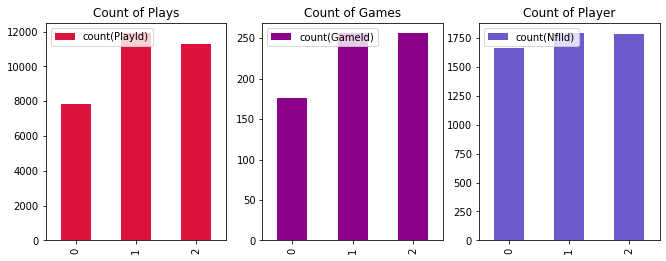

In [ ]:
playIddistinct = playIddistinct.toPandas()
GameIddistinct = GameIddistinct.toPandas()
NflIddistinct = NflIddistinct.toPandas()

f,ax=plt.subplots(1,3,figsize=(11,4))
playIddistinct.plot(ax=ax[0],color='crimson', kind='bar')

ax[0].set_title('Count of Plays')
GameIddistinct.plot(ax=ax[1],color='darkmagenta', kind='bar')

ax[1].set_title('Count of Games')
NflIddistinct.plot(ax=ax[2],color='slateblue', kind='bar')

ax[2].set_title('Count of Player')

plt.show()

In [ ]:
#Pandas
start = time.time()
df_team = df_train.loc[:,['PlayId', 'Team']].drop_duplicates()
teamcount = df_team["Team"].value_counts()
end = time.time()
print(end-start)

#Spark
start = time.time()
team_count = df.select('PlayId', 'Team').drop_duplicates().groupby('Team').count().orderBy('count', ascending=False)
end = time.time()
print(end-start)



team_count = team_count.toPandas()
print(team_count)
fig = px.bar(team_count, x='Team', y='count')
fig.update_layout(
    title_text="Team (Away or Home)", height=300, width=300)

fig.show()

0.06680822372436523
0.03702592849731445
   Team  count
0  away  31007
1  home  31007


0.20131516456604004
0.04860806465148926
+-------+------------------+---------------+------------+------------+-----------------+
|  NflId|       DisplayName|PlayerBirthDate|PlayerWeight|PlayerHeight|PlayerCollegeName|
+-------+------------------+---------------+------------+------------+-----------------+
|2555421|   Yannick Ngakoue|     03/31/1995|         246|         6-2|         Maryland|
|2506540|        Joe Berger|     05/25/1982|         305|         6-5|    Michigan Tech|
|2543799|     Ross Cockrell|     08/06/1991|         191|         6-0|             Duke|
|2558191|   Nathan Peterman|     05/04/1994|         225|         6-2|       Pittsburgh|
|2560766|     Taron Johnson|     07/27/1996|         192|        5-11|      Weber State|
|2560981|     Orlando Brown|     05/02/1996|         345|         6-8|         Oklahoma|
|2558023|      Eric Saubert|     05/01/1994|         253|         6-5|            Drake|
|2555181|        Evan Boehm|     08/19/1993|         321|         6-3|

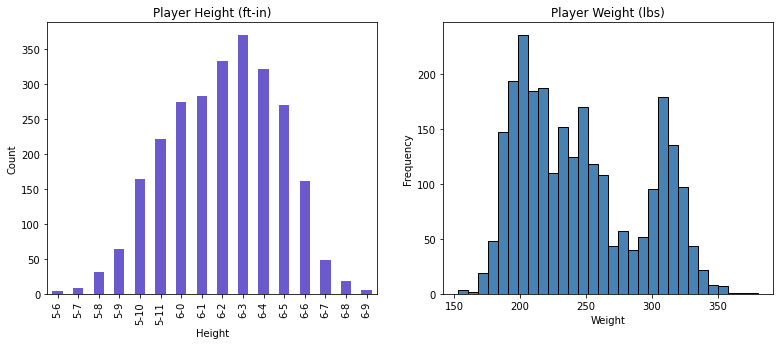

In [ ]:
#Pandas
start = time.time()
df_player = df_train.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName']].drop_duplicates()
end = time.time()
print(end-start)

#Spark
start = time.time()
df_player = df.select('NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName').drop_duplicates()
end = time.time()
print(end-start)

df_player.show()

df_player = df_player.toPandas()
df_player = df_player.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight', 'PlayerCollegeName']].drop_duplicates()
df_player["HeightFt"] = df_player["PlayerHeight"].str.split('-', expand=True)[0].astype(int)
df_player["HeightIn"] = df_player["PlayerHeight"].str.split('-', expand=True)[1].astype(int)
df_player["HeightCm"] = df_player["HeightFt"]*30.48 + df_player["HeightIn"]*2.54
df_player['PlayerWeight'] = df_player['PlayerWeight'].astype(float)
df_player["WeightKg"] = df_player["PlayerWeight"]*0.45359237
df_height = df_player.groupby(['PlayerHeight','HeightFt','HeightIn']).size().reset_index().sort_values(["HeightFt", "HeightIn"])
df_height.columns = ["PlayerHeight","HeightFt","HeightIn","Count"]
f,ax=plt.subplots(1,2,figsize=(13,5))
df_height.loc[:,["PlayerHeight","Count"]].set_index("PlayerHeight").plot(ax=ax[0],color='slateblue', kind='bar')

ax[0].set_xlabel("Height") 
ax[0].set_ylabel("Count") 
ax[0].get_legend().remove()
ax[0].set_title('Player Height (ft-in)')

df_player.PlayerWeight.plot.hist(ax=ax[1],bins=30,edgecolor='black',color='steelblue')

ax[1].set_xlabel("Weight") 
ax[1].set_title('Player Weight (lbs)')

plt.show()

In [ ]:
fig = go.Figure(data=go.Scattergl
(
    x = df_player["HeightCm"], 
    y = df_player["WeightKg"],
    mode='markers',
    text = df_player['DisplayName'],
    marker=dict(line_width=0.4),
    marker_color='rgb(0,145,119)'))

fig.update_layout(title='Weight Height Correlation', height=600, width=800)
fig.update_xaxes(title_text="Height (Cm)")
fig.update_yaxes(title_text="Weight (Kg)")

fig.show()

In [ ]:
Collage = df_player["PlayerCollegeName"].value_counts()
df_CollageCount = pd.DataFrame({'College Name':Collage.index, 'Count':Collage.values}).sort_values("Count", ascending = False).head(50)

fig = px.bar(df_CollageCount, x='College Name', y='Count', title="The 50 Top Colleges With The Most Players", height=700, width=800)

fig.update_traces(marker_color='rgb(239, 117, 100)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=2, opacity=0.7)

fig.show()

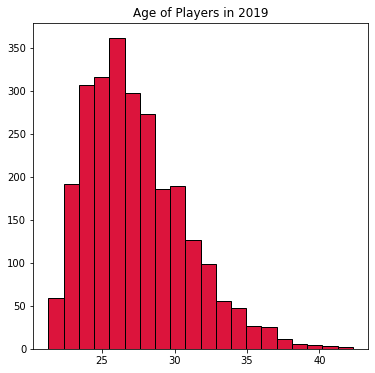

In [ ]:
df_player['BirthDate'] = df_player['PlayerBirthDate'].astype('datetime64[ns]')
#df_train["TimeSnap"].astype('datetime64[ns]').sort_values(ascending=False)
#max date in TimeSnap cloumn is 2018-12-31, so i'm not using today function

df_player['MaxDate'] = pd.to_datetime('2019-11-26')

df_player['Age'] = round((df_player['MaxDate'] - df_player['BirthDate'])/np.timedelta64(1,'D')/365.25,1)

plt.figure(figsize=(6,6))

plt.hist(df_player["Age"], bins=20 ,edgecolor='black', color='crimson')
plt.title("Age of Players in 2019")

plt.show()

In [ ]:
#Pandas
start = time.time()
df_stadium = df_train.loc[:,["PlayId","Stadium", "StadiumType"]].drop_duplicates()
end = time.time()
print(end-start)

#Spark
start = time.time()
df_stadium = df.select("PlayId","Stadium", "StadiumType").drop_duplicates()
end = time.time()
print(end-start)
df_stadium = df_stadium.toPandas()
stadium = df_stadium["Stadium"].value_counts()
df_stadiumCount = pd.DataFrame({'Stadium':stadium.index, 'Count':stadium.values}).sort_values("Stadium")
fig = px.bar(df_stadiumCount, x='Stadium', y='Count', title="Games by Stadium", height=700, width=800)
fig.update_traces(marker_color='darkorange', marker_line_color='rgb(8,48,107)',
                  marker_line_width=2, opacity=0.7)

fig.show()

0.1800251007080078
0.019976377487182617


In [ ]:
StadiumType = df_stadium["StadiumType"].value_counts()

df_StadiumType = pd.DataFrame({'StadiumType':StadiumType.index, 'Count':StadiumType.values}).sort_values("StadiumType")

fig = px.bar(df_StadiumType, x='StadiumType', y='Count', title="Games by Stadium Type", height=600, width=800)

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.show()

In [ ]:
#Pandas
start = time.time()
stadium_loc = df_train.loc[:,['GameId', 'Location']].drop_duplicates()
stadium_loc = stadium_loc['Location'].value_counts()
end = time.time()
print(end-start)

#Spark
start = time.time()
stadium_loc = df.select("GameId", "Location").drop_duplicates()
stadium_loc = stadium_loc.groupBy('Location').count().orderBy('count')
end = time.time()
print(end-start)

df_stadium_loc = stadium_loc.toPandas()
print(stadium_loc)
df_stadium_loc["State"] = df_stadium_loc["Location"].str.split(', ', expand=True)[0]
df_stadium_loc["StateAbb"] = df_stadium_loc["Location"].str.split(', ', expand=True)[1]


fig = go.Figure(data=go.Choropleth(
    locations=df_stadium_loc["StateAbb"], 
    z = df_stadium_loc['count'], 
    locationmode = 'USA-states', 
    text = df_stadium_loc['State'],
    colorscale=
            [[0.0, "rgb(251, 237, 235)"],
            [0.09, "rgb(245, 211, 206)"],
            [0.12, "rgb(239, 179, 171)"],
            [0.15, "rgb(236, 148, 136)"],
            [0.22, "rgb(239, 117, 100)"],
            [0.35, "rgb(235, 90, 70)"],
            [0.45, "rgb(207, 81, 61)"],
            [0.65, "rgb(176, 70, 50)"],
            [0.85, "rgb(147, 59, 39)"],
            [1.00, "rgb(110, 47, 26)"]],
    autocolorscale = False))

fig.update_layout(
    geo_scope='usa',
    title_text = 'Total Number of Games by States', height=500, width=700)

fig.show()

0.16622090339660645
0.06373167037963867
DataFrame[Location: string, count: bigint]


In [ ]:
#Pandas
start = time.time()
df_Off = df_train.loc[:,["PlayId","OffensePersonnel"]].drop_duplicates()
df_Off["OffensePersonnel"] = df_Off["OffensePersonnel"].str.replace(",1", ", 1")
df_Off["OffensePersonnel"] = df_Off["OffensePersonnel"].str.replace(",2", ", 2")
OffenseCount = df_Off["OffensePersonnel"].value_counts()
end = time.time()
print(end-start)


#Spark
start = time.time()
df_Off = df.select("PlayId", "OffensePersonnel").drop_duplicates()
df_Off = df_Off.withColumn('OffensePersonnel', regexp_replace('OffensePersonnel', ',1', ', 1')) 
df_Off = df_Off.withColumn('OffensePersonnel', regexp_replace('OffensePersonnel', ',2', ', 2')) 
OffenseCount = df_Off.groupBy('OffensePersonnel').count().orderBy('count')
end = time.time()
print(end-start)

OffenseCount.show()
OffenseCount = OffenseCount.toPandas()


dic_Offense = {'DL': [0],'LB': [0],'DB': [0],'OL': [0],'RB': [0],'TE': [0],'WR': [0],'QB': [0]}

df_Offense = pd.DataFrame.from_dict(dic_Offense, orient='index')

df_Offense.columns = ["Count"]
for i in OffenseCount.OffensePersonnel:
  for j in i.split(", "):
      df_Offense.loc[ j.split(" ")[1] : j.split(" ")[1],:] += int(j.split(" ")[0]) * OffenseCount.loc[OffenseCount['OffensePersonnel'] == i, 'count'].iloc[0]
  #     df_Offense.loc[ j.split(" ")[1] : j.split(" ")[1],:] += int(j.split(" ")[0]) * OffenseCount[i]

0.16968464851379395
0.04265332221984863
+--------------------+-----+
|    OffensePersonnel|count|
+--------------------+-----+
|6 OL, 3 RB, 0 TE,...|    1|
|2 QB, 2 RB, 2 TE,...|    1|
|2 QB, 3 RB, 1 TE,...|    1|
|    2 RB, 3 TE, 1 WR|    1|
|6 OL, 0 RB, 2 TE,...|    1|
|    1 RB, 2 TE, 3 WR|    1|
|6 OL, 1 RB, 1 TE,...|    1|
|6 OL, 1 RB, 1 TE,...|    1|
|1 RB, 3 TE, 0 WR,...|    1|
|2 RB, 1 TE, 1 WR,...|    1|
|6 OL, 1 RB, 0 TE,...|    2|
|7 OL, 1 RB, 1 TE,...|    2|
|2 QB, 1 RB, 3 TE,...|    2|
|    0 RB, 0 TE, 5 WR|    2|
|2 RB, 2 TE, 0 WR,...|    2|
|7 OL, 1 RB, 1 TE,...|    2|
|1 RB, 2 TE, 1 WR,...|    3|
|2 QB, 2 RB, 0 TE,...|    3|
|    0 RB, 3 TE, 2 WR|    3|
|1 RB, 1 TE, 2 WR,...|    3|
+--------------------+-----+
only showing top 20 rows



In [ ]:
colors = ['g', 'b', 'p', 'plum', 'gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=df_Offense.index.values.tolist(), 
                             values=df_Offense["Count"].tolist() , hole=.3)])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Offensive Players Ratio in All Plays", height=500, width=700)

fig.show()

In [ ]:


#Pandas
start = time.time()
df_Off = df_train.loc[:,["PlayId","DefensePersonnel"]].drop_duplicates()
df_Off["DefensePersonnel"] = df_Off["DefensePersonnel"].str.replace(",1", ", 1")
df_Off["DefensePersonnel"] = df_Off["DefensePersonnel"].str.replace(",2", ", 2")
OffenseCount = df_Off["DefensePersonnel"].value_counts()
end = time.time()
print(end-start)


#Spark
start = time.time()
df_Off = df.select("PlayId", "DefensePersonnel").drop_duplicates()
df_Off = df_Off.withColumn('DefensePersonnel', regexp_replace('DefensePersonnel', ',1', ', 1')) 
df_Off = df_Off.withColumn('DefensePersonnel', regexp_replace('DefensePersonnel', ',2', ', 2')) 
OffenseCount = df_Off.groupBy('DefensePersonnel').count().orderBy('count')
end = time.time()
print(end-start)

OffenseCount.show()
OffenseCount = OffenseCount.toPandas()


dic_Offense = {'DL': [0],'LB': [0],'DB': [0],'OL': [0],'RB': [0],'TE': [0],'WR': [0],'QB': [0]}

df_Offense = pd.DataFrame.from_dict(dic_Offense, orient='index')
df_Offense.columns = ["Count"]

for i in OffenseCount.DefensePersonnel:
  for j in i.split(", "):
      df_Offense.loc[ j.split(" ")[1] : j.split(" ")[1],:] += int(j.split(" ")[0]) * OffenseCount.loc[OffenseCount['DefensePersonnel'] == i, 'count'].iloc[0]
  
colors = ['g', 'b', 'p', 'plum', 'gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=df_Offense.index.values.tolist(), 
                             values=df_Offense["Count"].tolist() , hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Defense Players Ratio in All Plays", height=500, width=700)

fig.show()  
  #     df_Offense.loc[ j.split(" ")[1] : j.split(" ")[1],:] += int(j.split(" ")[0]) * OffenseCount[i]

0.32178711891174316
0.03984355926513672
+--------------------+-----+
|    DefensePersonnel|count|
+--------------------+-----+
|4 DL, 5 LB, 1 DB,...|    1|
|3 DL, 4 LB, 3 DB,...|    1|
|    7 DL, 2 LB, 2 DB|    1|
|    4 DL, 3 LB, 5 DB|    1|
|    6 DL, 1 LB, 4 DB|    1|
|    1 DL, 2 LB, 8 DB|    1|
|0 DL, 4 LB, 6 DB,...|    1|
|3 DL, 4 LB, 3 DB,...|    2|
|    0 DL, 6 LB, 5 DB|    2|
|2 DL, 3 LB, 5 DB,...|    2|
|5 DL, 4 LB, 1 DB,...|    3|
|    4 DL, 6 LB, 1 DB|    3|
|2 DL, 4 LB, 4 DB,...|    3|
|    4 DL, 0 LB, 7 DB|    3|
|1 DL, 3 LB, 6 DB,...|    4|
|    0 DL, 4 LB, 7 DB|    6|
|    0 DL, 5 LB, 6 DB|    6|
|5 DL, 3 LB, 2 DB,...|    7|
|1 DL, 4 LB, 5 DB,...|    7|
|2 DL, 4 LB, 4 DB,...|   10|
+--------------------+-----+
only showing top 20 rows



In [ ]:
#Pandas
start = time.time()
df_speed = df_train.loc[:,['DisplayName', 'S']].groupby('DisplayName').mean()
end = time.time()
print(end-start)

#Spark
start = time.time()
df_speed = df.select('DisplayName', 'S').groupBy('DisplayName').agg(mean('S'))
end = time.time()
print(end-start)


df_speed.show()
df_speed = df_speed.toPandas()
df_speed = df_speed.sort_values("avg(S)", ascending = False)


0.056795358657836914
0.028219223022460938
+----------------+------------------+
|     DisplayName|            avg(S)|
+----------------+------------------+
|  Michael Pierce|1.6544554455445541|
|      Greg Mancz| 2.074529914529915|
|Patrick Robinson| 2.256918918918919|
| Darian Thompson| 2.371149897330595|
|      Bud Dupree| 2.674929936305733|
|  Elijah McGuire| 3.982349726775955|
|      Matt Skura| 1.779758771929824|
|  Scott Simonson| 3.013445945945946|
|     Will Dissly| 3.023677419354839|
|  Austin Calitro|3.1162992125984252|
|  Mike Gillislee| 4.329837398373986|
|     Eric Fisher|2.2046233382570173|
|    Trey Flowers|1.8825938009787924|
| Courtney Upshaw|2.2628571428571425|
|     Donald Penn|2.0805451127819548|
|    Torrey Smith|3.9150621118012423|
|  Mark Glowinski|2.1644869565217393|
|    Cameron Wake| 2.140110192837465|
|  Bradley Sowell| 2.671523809523809|
|   Jordan Leslie| 3.641428571428572|
+----------------+------------------+
only showing top 20 rows



In [ ]:
fig = px.histogram(df_speed, x="avg(S)",
                   title='Average Speed Distribution of Players',
                   opacity=0.8,
                   color_discrete_sequence=['indianred']
                   )

fig.update_layout(
    yaxis_title_text='Count',
    height=500, width=800)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.8
                 )

fig.show()

In [14]:
import pyspark.sql.functions as f
#Pandas
start = time.time()
df_speed_yards = df_train[df_train["NflIdRusher"] == df_train["NflId"]].loc[:,['GameId', 'DisplayName', 'S', 'Yards']]
end = time.time()
print(end-start)



#Spark
start = time.time()
df_speed_yards = df.filter(df['NflIdRusher'] == df['NflId']).select('GameId', 'DisplayName', 'S', 'Yards')
end = time.time()
print(end-start)
df_speed_yards.show()
df_speed_yards = df_speed_yards.toPandas()
df_speed_yards['S'] = df_speed_yards['S'].astype("float")
df_speed_yards['Yards'] = df_speed_yards['Yards'].astype("float")
df_speed_yards = df_speed_yards.sort_values(['S', 'Yards'],
              ascending = [True, True])

fig = go.Figure(data=go.Scattergl
(
    x = df_speed_yards["Yards"], 
    y = df_speed_yards["S"],
    text = df_speed_yards['DisplayName'],
    mode='markers',
    marker=dict(line_width=0.4),
    marker_color='darkorange'))

fig.update_layout(title='Speed to Yards', height=700, width=800)

fig.update_xaxes(title_text="Yards")
fig.update_yaxes(title_text="Speed (yards/second)")

fig.show()



0.0379023551940918
0.02102494239807129
+----------+--------------+----+-----+
|    GameId|   DisplayName|   S|Yards|
+----------+--------------+----+-----+
|2017090700|   James White|3.63|    8|
|2017090700|   James White|3.06|    3|
|2017090700|   James White|5.77|    5|
|2017090700|Mike Gillislee|4.45|    2|
|2017090700|   Kareem Hunt| 3.9|    7|
|2017090700|   James White|3.32|   10|
|2017090700|  Rex Burkhead| 4.8|   -1|
|2017090700|Mike Gillislee|3.65|    0|
|2017090700|   Kareem Hunt|4.77|    9|
|2017090700|   Kareem Hunt|3.64|    9|
|2017090700|   Kareem Hunt|4.34|    2|
|2017090700|Mike Gillislee|2.82|    3|
|2017090700|   Chris Hogan|6.55|   13|
|2017090700|   James White|5.47|    4|
|2017090700|   James White|2.39|    0|
|2017090700|   Tyreek Hill|6.65|    4|
|2017090700|   Chris Hogan|7.31|    4|
|2017090700|Mike Gillislee|6.28|    4|
|2017090700|   Chris Hogan|6.94|    0|
|2017090700|Mike Gillislee|5.24|   16|
+----------+--------------+----+-----+
only showing top 20 rows


In [16]:

#Pandas
start = time.time()
df_MaxSpeed = df_train.loc[:,['DisplayName', 'PlayerBirthDate', 'TimeSnap', 'S', 'Orientation']].groupby(['DisplayName', 'PlayerBirthDate'], as_index=False).max()
end = time.time()
print(end-start)

#Spark
start = time.time()
windowDept = Window.partitionBy(['DisplayName', 'PlayerBirthDate']).orderBy(col("S").desc())
df_MaxSpeed = df.withColumn("row",row_number().over(windowDept)) \
  .filter(col("row") == 1).drop("row").select('DisplayName', 'PlayerBirthDate', 'TimeSnap', 'S', 'Orientation')
end = time.time()
print(end-start)
# df_MaxSpeed.show()

df_MaxSpeed = df_MaxSpeed.toPandas()
df_MaxSpeed['S'] = df_MaxSpeed['S'].astype("float")
df_MaxSpeed = df_MaxSpeed.sort_values(['S'],
              ascending = [True])

print(df_MaxSpeed)


df_MaxSpeed["Age"] = round((df_MaxSpeed['TimeSnap'].astype('datetime64[ns]') - df_MaxSpeed['PlayerBirthDate'].astype('datetime64[ns]'))/np.timedelta64(1,'D')/365.25,1)
df_MaxSpeed = df_MaxSpeed.sort_values('S')
fig = go.Figure(data=go.Scattergl
(
    x = df_MaxSpeed["S"], 
    y = df_MaxSpeed["Age"],
    text = df_MaxSpeed['DisplayName'],
    mode='markers',
    marker=dict(line_width=0.4),
    marker_color='mediumorchid'
)
               ) 

fig.update_layout(title='Age of The Players When They Make Their Maximum Speed', height=700, width=800)
fig.update_traces(marker_line_color='rgb(8,48,107)', opacity=0.7)

fig.update_xaxes(title_text="Speed of Player (yards/second)")
fig.update_yaxes(title_text="Age")

fig.show()

0.5983283519744873
0.3033320903778076
           DisplayName PlayerBirthDate                  TimeSnap     S  \
2015      Joshua Perry      04/26/1994  2017-11-12T18:21:04.000Z  0.68   
1530     Channing Ward      09/17/1992  2017-12-31T23:49:44.000Z  0.68   
535          J.T. Gray      01/18/1996  2019-11-10T20:41:37.000Z  0.74   
1240       Trey Walker      02/01/1995  2018-09-16T20:20:03.000Z  0.94   
1692    Deiondre' Hall      05/31/1994  2017-12-10T18:59:35.000Z  1.15   
...                ...             ...                       ...   ...   
1184          Ted Ginn      04/12/1985  2017-11-19T20:21:43.000Z  9.01   
878   Marquise Goodwin      11/19/1990  2019-09-08T22:56:20.000Z  9.08   
1655     Davante Adams      12/24/1992  2018-10-16T00:46:52.000Z  9.17   
314    Darius Jennings      06/28/1992  2018-10-07T18:09:02.000Z  9.33   
1215   Travis Benjamin      12/29/1989  2018-11-25T21:50:55.000Z  9.41   

     Orientation  
2015       27.13  
1530      211.66  
535       250.95

In [ ]:
df_MaxSpeed = df_train.loc[:,['DisplayName', 'PlayerBirthDate', 'TimeSnap', 'S', 'Orientation']].groupby(['DisplayName', 'PlayerBirthDate'], as_index=False).max()

df_MaxSpeed["Age"] = round((df_MaxSpeed['TimeSnap'].astype('datetime64[ns]') - df_MaxSpeed['PlayerBirthDate'].astype('datetime64[ns]'))/np.timedelta64(1,'D')/365.25,1)
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_MaxSpeed["S"], y=df_MaxSpeed["Orientation"],
                    mode='markers',
                    text = df_MaxSpeed['DisplayName'],     
                    name='Speed',
                    marker=dict(line_width=0.4)
                    )
             )

fig.add_trace(go.Scatter(x=df_MaxSpeed["Age"], y=df_MaxSpeed["Orientation"],
                    mode='markers',
                    text = df_MaxSpeed['DisplayName'],     
                    name='Age',
                    marker=dict(line_width=0.4)
                    )
             )

fig.update_layout(title='Orientation & Speed +  Orientation & Age Correlation', height=500, width=800)

fig.update_traces(marker_line_color='rgb(8,48,107)', opacity=0.8)
fig.update_yaxes(title_text="Orientation")

fig.show()

In [ ]:
#Spark
start = time.time()
df_defenders = df.select('DefendersInTheBox', 'Yards')
d1 = df_defenders.filter(df_defenders.DefendersInTheBox==1)
d2 = df_defenders.filter(df_defenders.DefendersInTheBox==2)
d3 = df_defenders.filter(df_defenders.DefendersInTheBox==3)
d4 = df_defenders.filter(df_defenders.DefendersInTheBox==4)
d5 = df_defenders.filter(df_defenders.DefendersInTheBox==5)
d6 = df_defenders.filter(df_defenders.DefendersInTheBox==6)
d7 = df_defenders.filter(df_defenders.DefendersInTheBox==7)
d8 = df_defenders.filter(df_defenders.DefendersInTheBox==8)
d9 = df_defenders.filter(df_defenders.DefendersInTheBox==9)
d10 = df_defenders.filter(df_defenders.DefendersInTheBox==10)
d11 = df_defenders.filter(df_defenders.DefendersInTheBox==11)
end = time.time()
print(end-start)

#Pandas
start = time.time()
df_defenders = df_train.loc[:,['DefendersInTheBox', 'Yards']]
d1 = df_defenders[df_defenders.DefendersInTheBox==1]['Yards']
d2 = df_defenders[df_defenders.DefendersInTheBox==2]['Yards']
d3 = df_defenders[df_defenders.DefendersInTheBox==3]['Yards']
d4 = df_defenders[df_defenders.DefendersInTheBox==4]['Yards']
d5 = df_defenders[df_defenders.DefendersInTheBox==5]['Yards']
d6 = df_defenders[df_defenders.DefendersInTheBox==6]['Yards']
d7 = df_defenders[df_defenders.DefendersInTheBox==7]['Yards']
d8 = df_defenders[df_defenders.DefendersInTheBox==8]['Yards']
d9 = df_defenders[df_defenders.DefendersInTheBox==9]['Yards']
d10 = df_defenders[df_defenders.DefendersInTheBox==10]['Yards']
d11 = df_defenders[df_defenders.DefendersInTheBox==11]['Yards']
end = time.time()
print(end-start)






0.12029504776000977
0.038666725158691406


In [ ]:
fig = go.Figure()
yards = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11]
tags = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]

for index, category in enumerate(yards):
    fig.add_trace(go.Box(y=category, name=tags[index]))
    
fig.update_layout(autosize=False, width=800,height=500,showlegend=False,
                  title="Yards and Number of Defenders in the Box Correlation", 
                  yaxis=dict(title="Yards"), 
                  xaxis=dict(title="Number of Players"),
                  paper_bgcolor='rgb(243, 243, 243)', 
                  plot_bgcolor='rgb(243, 243, 243)', 
                  margin=dict(l=40,r=30,b=80,t=100,)
                 )

fig.show()

In [ ]:
#Pandas
start = time.time()
df_OffenseForm = df_train.loc[:,['PlayId', 'OffenseFormation', 'Season']].drop_duplicates()
OffenseForm2017 = df_OffenseForm[df_train["Season"] == 2017]["OffenseFormation"].value_counts()
OffenseForm2018 = df_OffenseForm[df_train["Season"] == 2018]["OffenseFormation"].value_counts()
OffenseForm2019 = df_OffenseForm[df_train["Season"] == 2019]["OffenseFormation"].value_counts()
end = time.time()
print(end-start)

#Spark
start = time.time()
df_OffenseForm = df.select('PlayId', 'OffenseFormation', 'Season').drop_duplicates()
OffenseForm2017 = df_OffenseForm.filter(df_OffenseForm.Season == 2017).groupby("OffenseFormation").count()
OffenseForm2018 = df_OffenseForm.filter(df_OffenseForm.Season == 2018).groupby("OffenseFormation").count()
OffenseForm2019 = df_OffenseForm.filter(df_OffenseForm.Season == 2019).groupby("OffenseFormation").count()
end = time.time()
print(end-start)
OffenseForm2017 = OffenseForm2017.toPandas()
OffenseForm2018 = OffenseForm2018.toPandas()
OffenseForm2019 = OffenseForm2019.toPandas()
print(OffenseForm2017)


fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(labels=OffenseForm2017['OffenseFormation'], values=OffenseForm2017['count'], name="2017"),
              1, 1)

fig.add_trace(
    go.Pie(labels=OffenseForm2018['OffenseFormation'], values=OffenseForm2018['count'], name="2018"),
              1, 2)

fig.add_trace(
    go.Pie(labels=OffenseForm2019['OffenseFormation'], values=OffenseForm2019['count'], name="2019"),
              1, 3)

fig.update_traces(hole=.4, hoverinfo="label+value")

fig.update_layout(
    title_text="Favorite Offense Formation in 2017 and 2018 and 2019",
    height=500, width=800,
    annotations=[dict(text='2017', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='2018', x=0.52, y=0.5, font_size=20, showarrow=False),
                 dict(text='2019', x=0.86, y=0.5, font_size=20, showarrow=False)
                 ]
)

fig.show()

<ipython-input-77-5b99b0157926>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-77-5b99b0157926>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-77-5b99b0157926>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.25641703605651855
0.11635327339172363
  OffenseFormation  count
0           PISTOL    273
1             None      2
2            EMPTY      8
3          WILDCAT     10
4       SINGLEBACK   5330
5           I_FORM   2763
6            JUMBO    277
7          SHOTGUN   3236
8              ACE      1


In [15]:
#pandas
start = time.time()
df_xy = df_train[(df_train["NflIdRusher"] == df_train["NflId"])].loc[:,["Yards", "DefendersInTheBox", "X", "Y" ]].sort_values("X" )
end = time.time()
print(end-start)

#spark
start = time.time()
df_xy = df.filter(df.NflIdRusher == df.NflId).select("Yards", "DefendersInTheBox", "X", "Y" )
end = time.time()
print(end-start)





df_xy = df_xy.toPandas()
df_xy["X"] = df_xy["X"].astype("float")
df_xy["Y"] = df_xy["Y"].astype("float")

df_xy = df_xy.sort_values(['X', 'Y'],
              ascending = [True, True])



fig = go.Figure(data=go.Scattergl
(
    x = df_xy["X"], 
    y = df_xy["Y"],
    mode='markers',
    marker=dict(line_width=0.8),
    marker_color='tan'))

fig.update_layout(title='X and Y Positions of Players', height=700, width=800)
fig.update_traces(marker_line_color='rgb(8,48,107)', opacity=0.7)

fig.update_xaxes(title_text="X")
fig.update_yaxes(title_text="Y")

fig.show()

0.10173249244689941
0.03893470764160156


In [ ]:
def State_Visuallize():
    stadium_loc = df.select("GameId", "Location").drop_duplicates()
    stadium_loc = stadium_loc.groupBy('Location').count().orderBy('count')


    df_stadium_loc = stadium_loc.toPandas()
    # print(str(df_stadium_loc['Location'][0]))
    df_stadium_loc["State"] = df_stadium_loc["Location"].str.split(', ', expand=True)[0]
    df_stadium_loc["StateAbb"] = df_stadium_loc["Location"].str.split(', ', expand=True)[1]


    fig = go.Figure(data=go.Choropleth(
        locations=df_stadium_loc["StateAbb"], 
        z = df_stadium_loc['count'], 
        locationmode = 'USA-states', 
        text = df_stadium_loc['State'],
        colorscale=
                [[0.0, "rgb(251, 237, 235)"],
                [0.09, "rgb(245, 211, 206)"],
                [0.12, "rgb(239, 179, 171)"],
                [0.15, "rgb(236, 148, 136)"],
                [0.22, "rgb(239, 117, 100)"],
                [0.35, "rgb(235, 90, 70)"],
                [0.45, "rgb(207, 81, 61)"],
                [0.65, "rgb(176, 70, 50)"],
                [0.85, "rgb(147, 59, 39)"],
                [1.00, "rgb(110, 47, 26)"]],
        autocolorscale = False))

    fig.update_layout(
        geo_scope='usa',
        title_text = 'Total Number of Games by States', height=500, width=700)
    fig.show()

    # print(fig.to_html())
    # print(type(fig))
    # fig.write_image("test", engine='kaleido') 
    fig.write_image(file='test.png', format='png')
    # fig.savefig("test.png")
    
    return PIL.Image.open('test.png', 'r')

In [ ]:

title = "Big Data"
description = "NFL Analysis"


def fn(model_choice, input):
  if model_choice=="State":

    
    return State_Visuallize()
  

gr.Interface(fn, [gr.inputs.Dropdown(["State", "ABC"])], "image").launch()

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:217: UserWarning:

Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components

/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning:

`optional` parameter is deprecated, and it has no effect

/usr/local/lib/python3.8/dist-packages/gradio/utils.py:840: UserWarning:

Expected 2 arguments for function <function fn at 0x7f922fd57160>, received 1.

/usr/local/lib/python3.8/dist-packages/gradio/utils.py:844: UserWarning:

Expected at least 2 arguments for function <function fn at 0x7f922fd57160>, received 1.



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>